# ETL on Monthly Retail Trade Survey data

**Lagger Nicolas**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This report discusses the ETL (Extract, Transform, Load) process : from extraction of data from various sources, transformation of the data to fit the target system, and loading the transformed data into the target system are explained. The benefits of using the ETL process for businesses are also discussed, such as improved data management, better decision-making processes, and effective collaboration between departments. The report then focuses on the Monthly Retail Trade Survey, a widely used dataset that collects monthly sales and inventory data from US retail businesses. The data exploration and preparation steps using Excel macros, Python libraries and mysql are detailed. Then, the report explains the installation script used to automate the process, the creation of a database for the MRTS data. Finally, the report analyzes various categories using different value representation methods such as percentage Change and rolling time windows and a graph analysis is performed.

[Back to top](#Index)


## 1. Introduction


Data is an essential component of business intelligence and decision-making. It is vital to have a centralized database with accurate and reliable data that can be easily accessed by all relevant parties. The ETL (Extract, Transform, and Load) process is a significant method of collecting and centralizing data from various sources into a centralized database for analysis and reporting. The ETL process involves extracting data from various sources, transforming the data to fit the target system, and loading the transformed data into the target system.

This report discusses the ETL process and its importance, including its ability to centralize data, clean and standardize data, and improve the efficiency of analysis. In addition, we explore the benefits of integrating the ETL process with Python code, which can automate the process and make it a quick and efficient tool for businesses. Furthermore, we examine how the ETL process can lead to substantial improvements in a company's data management and decision-making processes.

[Back to top](#Index)

## 2. Extract-Transform-Load


### 2.1 The ETL Process

The ETL (Extract, Transform, and Load) process is a important method of collecting and centralizing data from various sources into a centralized database for analysis and reporting. It consists of three crucial steps:


* **Extraction of data from various sources**
    - Excl file
    - Activity logs (network traffic, error reports, etc.)
    - Behavior, application performance
    - website
    
    
* **Transformation of the data to fit the target system**
    - Standardization (date time for example)
    - Deleted duplicate value
    - Exclude non-useful information
    
    
* **Loading the transformed data into the target system**
    - creation of a script to load data in a database
    
    
    
The significance this process lies in its capacity to centralize data, enhancing visibility and improving the efficiency of analysis. 

The data transformation stage also cleans and standardizes data, thereby improving the quality and reliability of data used for reporting and analysis.

Integrating the ETL process with Python code can automate the process, making it a quick and efficient tool for businesses. In addition, centralizing data can resolve the common issue of data being scattered across different Excel files, making it easier to access data.

By using an ETL process, companies can also better track trends and patterns in their data, which can aid in making informed business decisions. Furthermore, it facilitates effective collaboration between departments as everyone has access to the same up-to-date information. Ultimately, using an ETL process can lead to substantial improvements in a company's data management and decision-making processes.


[Back to top](#Index)

### 2.2 Data Exploration

#### 2.2.1 Data description

The Monthly Retail Trade Survey collects data from about 13,000 US retail businesses on their monthly sales and inventories. The survey has been conducted since 1951. The data is widely used by government, academic, and business communities, and contributes to economic indicators. The survey is conducted through a mail-out/mail-back method and the data is released approximately 6 weeks after the end of the reference month.


#### 2.2.2   Content description


The layout of the Excel file is divided into 4 parts:

    Header containing the title and general information.
    Column names.
    Data sorted by category and month.
    Footer containing additional information.

Each Excel sheet has the same structure, except for the year 2021 which is not complete.

Suppressed values (indicated by "(S)") are estimates  do not meet publication standards due to high sampling variability.


[Back to top](#Index)

### 2.3 Data Preparation

In order to clean up the Excel file, I made a macro that removes the rows containing the general information at the top and the legend at the bottom. The macro also adjusted the header row to have an entire row with the column names.
For this exercise, I decided to keep only the unadjusted values, as these columns contain the total value for the year and make it easy to check the totals when importing into the SQL database. 
I used an other macro to save all csv files 

I also noticed that some cells contained commas, so I decided to create a CSV file with a ' ; ' separator to avoid any problems with the commas.

Below are the various excel macros used to prepare the file. The macro "Dosomething" was copied from the website "https://www.extendoffice.com/documents/excel/5333-excel-run-macro-multiple-sheets.html" and also the ExportSheetsToCSV was copide from a website "https://store.chipkin.com/articles/how-to-export-multiple-excel-sheets-to-csv-or-text-files-using-visual-basic
  "

The other macro was created in part with the function record marco then some lines were modified and added to execute what I need 

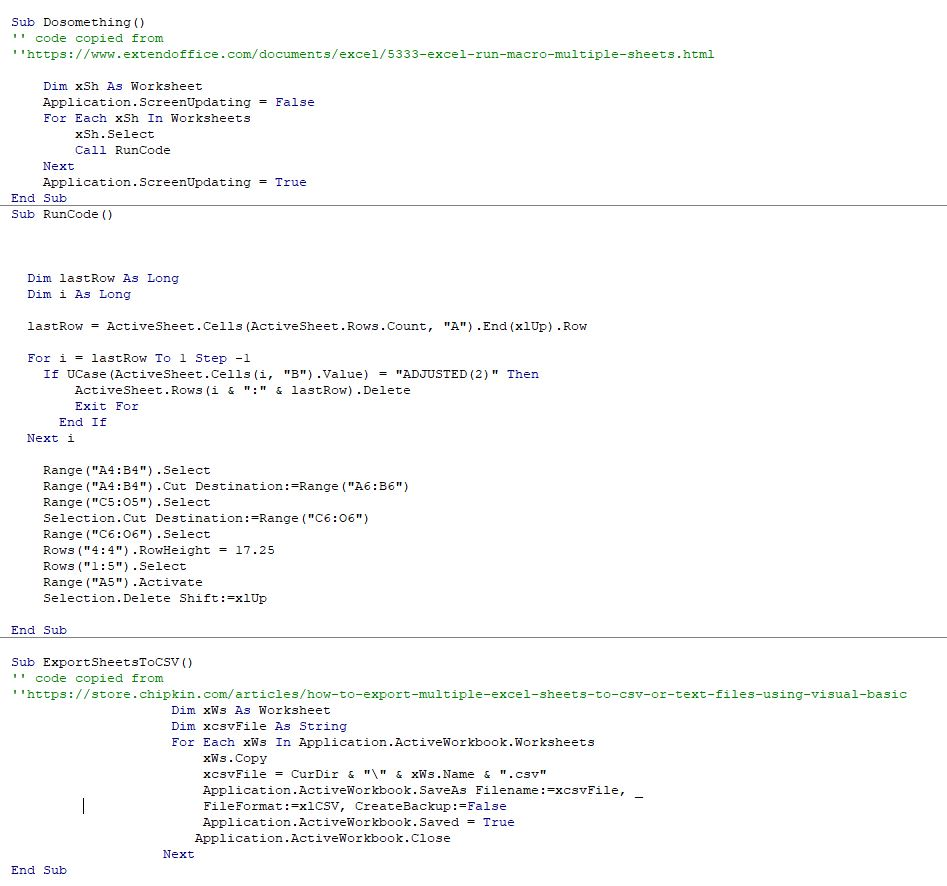


According to the instructions of the exercises, I performed this preparation step. However, during the live of 13/02/23, the professor Hauptmann pointed out that it is better to read the data directly from the source file without making any modifications, in order to automate the process.

[Back to top](#Index)

### 2.4 Read the Data Using Python

### 2.4.1 Reading Sample Data

I have created a dataset called "sport" which contains the names, first names, favorite sports and hated sports of my family members or acquaintances.

The code i used below is importing the "csv" module to read a CSV file named "sport.csv" located in the "csv" folder. Then, it is using a "for" loop to iterate through the rows of the CSV file. Finally, the code prints out row to the console. 



In [14]:
import csv

# Open file
with open('csv/sport.csv') as csv_file:
    
    # Read CSV file
    csv_reader = csv.reader(csv_file, delimiter=';')

    # Loop through data
    
    for row  in csv_reader:
        print(row)

['Last Name', 'First Name', 'favorit Sport', 'Hated sport']
['Lagger', 'Nicolas', 'Snowboard', 'Tennis']
['Lagger', 'Mona', 'Surf', 'cross-country skiing']
['Lagger', 'Nela', 'Snowboard', 'cross-country skiing']
['Pidoux', 'Quentin', 'cross-country skiing', 'Snowboard']
['Delessaire', 'Sebastion', 'swimming', 'Tennis']
['Cottet', 'Jonathan', 'cycling', 'Tennis']
['Lagger', 'Beatrice', 'Tennis', 'cross-country skiing']


To execute the Python code ""readcsv_sport.py" in the windows terminal i used these 2 methode 
below

**Methode 1**

    First, I navigated to the correct directory using the command "cd".
    Once in the appropriate directory, I selected the interpreter by running "C:/ProgramData/Anaconda3/python.exe" and
    executed the Python script "readcsv_sport.py" by including it as an argument in the previous command.
    

 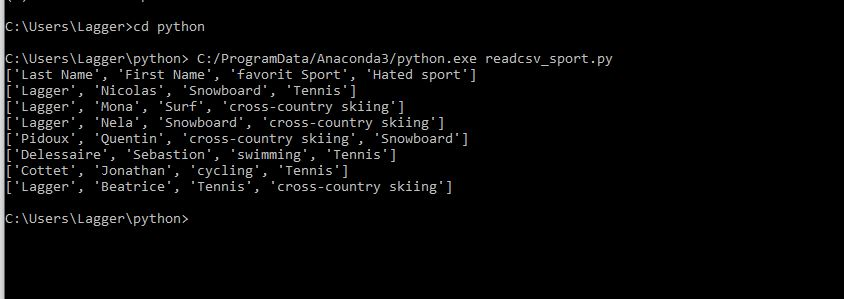
 
**Methode 2**
    
    First actived the anaconda base using the commande : conda activate base
    I navigated to the correct directory using the command "cd"   
    then, run the commande :python readcsv_sport.py
    

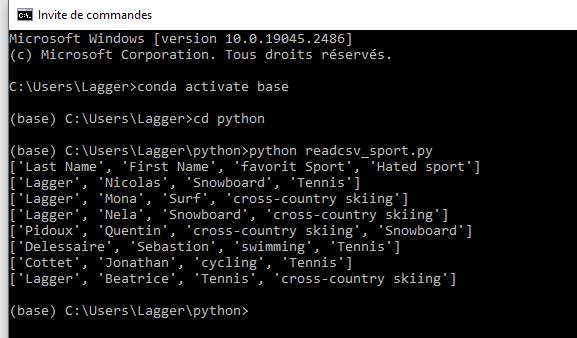

This allowed me to successfully load and run a CSV file using Python. 

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

At first the goal is to read only one CSV file, once this operation succeeded it is easy to make a loop to realize the same operation the number of times necessary

I used several methods to read the data from python. the first method is exactly the same as for the test file however I realized that given the amount of data in the file it is difficult to realize the content of the csv file

I then used the pandas library to import the csv file and display and print the first 10 lines to have a structured view of the data

The last method to import the data is also try out use also the pandas library but directly using the raw .xlsx file. The modifications described in chapter 2.3 are made directly when importing the files


In [15]:
# first methods usinge the CSV file 

import csv

# Open file
with open('csv/2020.csv') as csv_file:
    
    # Read CSV file
    csv_reader = csv.reader(csv_file, delimiter=';')

    # Loop through data
    
    for row in csv_reader:
        print(row)


['NAICS  Code', 'Kind of Business', 'Jan. 2020', 'Feb. 2020', 'Mar. 2020', 'Apr. 2020', 'May 2020', 'Jun. 2020', 'Jul. 2020', 'Aug. 2020', 'Sep. 2020', 'Oct. 2020', 'Nov. 2020', 'Dec. 2020', 'TOTAL', '']
['', 'Retail and food services sales, total', '480 301', '478 467', '478 267', '407 227', '504 607', '532 678', '549 416', '545 307', '530 987', '553 114', '543 273', '611 429', '6 215 073', '']
['', 'Retail sales and food services excl motor vehicle and parts', '386 934', '380 639', '395 880', '337 693', '397 245', '418 450', '433 183', '429 379', '417 929', '438 435', '440 053', '494 937', '4 970 757', '']
['', 'Retail sales and food services excl gasoline stations', '440 605', '441 504', '444 006', '380 417', '472 562', '496 364', '510 540', '506 577', '493 756', '514 953', '508 879', '574 794', '5 784 957', '']
['', 'Retail sales and food services excl motor vehicle and parts and gasoline stations', '347 238', '343 676', '361 619', '310 883', '365 200', '382 136', '394 307', '390 6

As you can see on the result above the CSV file contains empty lines at the end. It would be possible to redo the CSV export by taking only the rows that contain values, however I decided to keep these files and limit the number of rows imported when creating the database in the for loop to the number of rows.

the file use is "readcsv_mtrs.py"




below is an example of importing the csv using the panda library

In [16]:
# Second methods usinge the CSV file  with the pandas librery 

import pandas as pd

# Read a CSV file into a pandas DataFrame, using  (;) as the separator
df = pd.read_csv("csv/2020.csv", sep=";")

# Show the first 10 rows of the DataFrame
print(df.head(10))


  NAICS  Code                                   Kind of Business Jan. 2020  \
0         NaN              Retail and food services sales, total   480 301   
1         NaN  Retail sales and food services excl motor vehi...   386 934   
2         NaN  Retail sales and food services excl gasoline s...   440 605   
3         NaN  Retail sales and food services excl motor vehi...   347 238   
4         NaN                                Retail sales, total   418 734   
5         NaN  Retail sales, total (excl. motor vehicle and p...   325 367   
6         NaN                                            GAFO(1)    94 549   
7         441                    Motor vehicle and parts dealers    93 367   
8   4411,4412         Automobile and other motor vehicle dealers    85 832   
9        4411                                 Automobile dealers    81 214   

  Feb. 2020 Mar. 2020 Apr. 2020 May 2020 Jun. 2020 Jul. 2020 Aug. 2020  \
0   478 467   478 267   407 227  504 607   532 678   549 416   545 

[Back to top](#Index)

### 2.5 Writing an Installation Script

#### 2.5.1 Installation Script test CSV

The code below connects to a MySQL database and creates a new database and table. It then imports data from a CSV file into the new table.

The column names in the CSV file are used as column names for the new table, with spaces, punctuation, and quotes replaced with underscores.

The script prints the SQL statements it generates for creating the new table and inserting data into the table.

Finally, the script commits the changes to the database, closes the cursor and the database connection.

Initially, it seemed like a good idea to extract column names from the CSV file, which would save time during data import from the "mrtssales92-present.xls" file. However, i realized that this method may not be suitable for the database structure that needs to be created

In [18]:
import mysql.connector
import csv
import yaml


# Define the new database and table names
newDb = 'csvTest'
newTable ='sport'


# Define the CSV file to import
csvFile = 'csv/sport.csv'


#import connection yaml file 

with open('connection_test.yaml', 'r') as f:
    connection = yaml.safe_load(f)


# Connect to the MySQL server
cnx = mysql.connector.connect(**connection)

#  creates a cursor object that can be used to execute SQL queries
cursor = cnx.cursor()

# Drop the database if it already exists
dropDb = f'DROP DATABASE IF EXISTS {newDb}'
cursor.execute(dropDb)

# Create the new database
creatDB = f'CREATE DATABASE {newDb}'
cursor.execute(creatDB)

# Commit the changes to the database
cnx.commit()

# Connect to the newly created database
cnx = mysql.connector.connect(**connection, database = newDb)


cursor = cnx.cursor()


# Read the headers from the CSV file to create column names for the table
with open(csvFile) as csv_file:
    reader = csv.reader(csv_file, delimiter=";")
    headers = next(reader) # skip the header row
    columnNames = list(headers)

# Define the variable type for each column in the table
variableType = 'VARCHAR(50)'

# Generate the SQL statement to create the new table
tableCreation =f'CREATE TABLE {newTable}(\nID INT AUTO_INCREMENT PRIMARY KEY,\n'
tableList = []

# Generate column names for the new table based on the headers in the CSV file
for columnName in columnNames:
    colConcat = columnName.replace(" ", "_").replace(".", "").replace("(", "").replace(")", "").replace(",", "_").replace("'", "_")
    tableList.append(colConcat)
    tableCreation = f'{tableCreation} {colConcat} {variableType} NULL,\n'
    
# remove the last comma and whitespace character from a string     and add )
tableCreation=tableCreation[:-2]+ ')'

# Print the SQL statement to create the new table
print(f'SQL table creation\n {tableCreation}')

# Execute the SQL statement to create the new table
cursor.execute(tableCreation)

# Commit the changes to the database
cnx.commit()

# Generate the SQL statement to insert new data into the table
columnsString = ', '.join(tableList)

ValuesString = 'VALUES ('
for s  in range(len(tableList)-1): # -1 because the last string must contain "s)"
    ValuesString = f'{ValuesString}%s, '
ValuesString = f'{ValuesString}%s)'   

#Final INSERT INTO statment
tableInfo = f'INSERT INTO {newTable} ({columnsString}) {ValuesString}'

# Print the SQL statement to INSERT the new table
print(f'SQL insert into\n {tableInfo}')



# Read data from the CSV file and insert it into the new table
with open(csvFile) as csv_file:
    
    # Read CSV file
    reader = csv.reader(csv_file, delimiter=";")
    headers = next(reader) # skip the header row

    # Loop through data and insert each row into the new table
    for row in reader:
        print(row)
        cursor.execute(tableInfo,row)
        emp_no = cursor.lastrowid

# Commit the changes to the database
cnx.commit()

# Close the cursor and connection to the database
cursor.close()
cnx.close()

print("done")


SQL table creation
 CREATE TABLE sport(
ID INT AUTO_INCREMENT PRIMARY KEY,
 Last_Name VARCHAR(50) NULL,
 First_Name VARCHAR(50) NULL,
 favorit_Sport VARCHAR(50) NULL,
 Hated_sport VARCHAR(50) NULL)
SQL insert into
 INSERT INTO sport (Last_Name, First_Name, favorit_Sport, Hated_sport) VALUES (%s, %s, %s, %s)
['Lagger', 'Nicolas', 'Snowboard', 'Tennis']
['Lagger', 'Mona', 'Surf', 'cross-country skiing']
['Lagger', 'Nela', 'Snowboard', 'cross-country skiing']
['Pidoux', 'Quentin', 'cross-country skiing', 'Snowboard']
['Delessaire', 'Sebastion', 'swimming', 'Tennis']
['Cottet', 'Jonathan', 'cycling', 'Tennis']
['Lagger', 'Beatrice', 'Tennis', 'cross-country skiing']
done


Below the test installation script "creatSportDb.py" running in the windows terminal

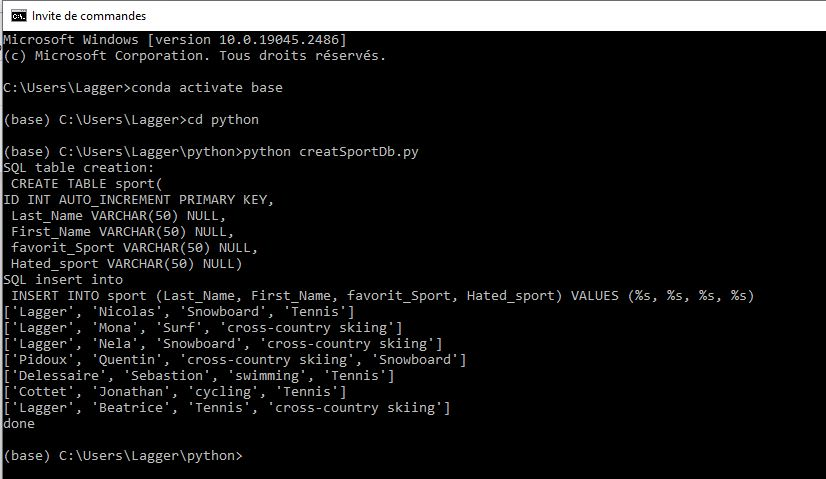

### 2.5.1 Installation script MRTS

To realize the database, I chose to separate the data into three distinct tables. I made this decision to avoid unnecessary repetition of "Kind_of_Business" and "NAICS_Code" in the main table. The third table contains the sum of sales by year, so this table is imported to perform a check on the imported data. However, this table has no other use, as it is easy to calculate the sum of sales by year using a MySQL query. By separating the data into several tables, the MRTS installation script optimizes the use of the database and facilitates further data processing.

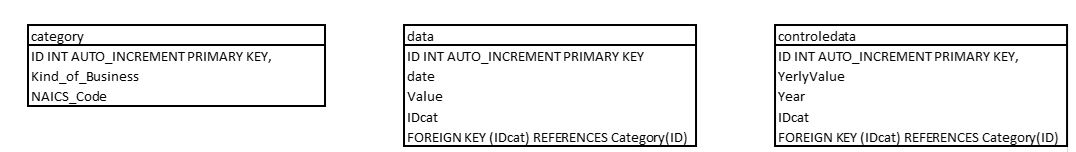


#### 2.5.1.2 Installation from csv file

The script consists of 4 parts:

**Part 1:**

    Checks if the database exists and deletes it if necessary, then creates the database and the three required tables.

**Part 2:**

    Imports the first two columns of the CSV file (NAICS_Code and Kind_of_Business) and creates a tuple for each row to be added to the database.

**Part 3:**

    Imports the values by category and date by browsing the CSV file with two loops.
    The first loop runs from 1 to 66 to take into account all the rows, while the second loop runs from 2 to 14 to take the values from the table.
    For each row, the date is transformed to datetime format and the ID of Kind_of_Business is also added.

**Part 4:**

    Imports the total values for each year by traversing only column 14 (which contains the value) with a loop from 1 to 66.


In [19]:
import csv
import mysql.connector
from datetime import datetime
import yaml

#csv file names
csvFile = [*range(1992, 2021, 1)]

#string to exclud during importation
listOfStrings = ['(NA)','','(S)']   

# New database name
newDb = 'mrts'

# Import connection YAML file 
with open('connection.yaml', 'r') as f:
    connection = yaml.safe_load(f)

# Connect to the MySQL server and create a new database named "newDb"
cnx = mysql.connector.connect(**connection)

# Create a new database named "newDb"
cursor = cnx.cursor()
cursor.execute(f'DROP DATABASE IF EXISTS {newDb}')           
cursor.execute(f'CREATE DATABASE {newDb}')
cnx.commit()

# Connect to the "newDb" database
cnx = mysql.connector.connect(**connection, database = newDb)
cursor = cnx.cursor()
# Create three new tables in the "newDb" database: "category", "data", and "controledata"

cursor.execute("""
                    CREATE TABLE category (
                    ID INT AUTO_INCREMENT PRIMARY KEY,                    
                    Kind_of_Business VARCHAR(255) NULL,
                    NAICS_Code VARCHAR(50) NULL
                    );
                """)

cursor.execute("""
                    CREATE TABLE data (
                    ID INT AUTO_INCREMENT PRIMARY KEY,
                    date DATE,
                    Value INT NULL,
                    IDcat INT,
                    FOREIGN KEY (IDcat) REFERENCES Category(ID)
                    );
                """)

cursor.execute("""
                    CREATE TABLE controledata (
                    ID INT AUTO_INCREMENT PRIMARY KEY,
                    YerlyValue INT NULL,
                    Year YEAR,
                    IDcat INT,
                    FOREIGN KEY (IDcat) REFERENCES Category(ID)
                    );      
""")

cnx.commit()


# Print "done" to indicate that the script has finished executing
print('Table creation done')


# Connect to the MySQL server and create a new database named "newDb"
cnx = mysql.connector.connect(**connection, database = newDb)
cursor = cnx.cursor()
  

# Define the columns for the category table
columns = ("""
            INSERT INTO category
            (NAICS_Code, Kind_of_Business)
            VALUES (%s, %s)
            """
            )

# Import data into the category table for the first CSV file

with open(f'csv/{csvFile[0]}.csv') as csv_file:
    
    # Read CSV file
    csv_reader = csv.reader(csv_file, delimiter=';')

    # Get the rows as a list
    rows = list(csv_reader)

    # Get the desired row and cell
    for y in range(1, 66):
        # loop troo row 
        desired_row = rows[y]
        
        #select naics_code column in the csv file
        naics_code = desired_row[0]
        
        #select kind_of_business column in the csv file
        kind_of_business = desired_row[1]
    
        data = (naics_code, kind_of_business)

        cursor.execute(columns, data)
        
# Commit the changes
cnx.commit()



def addData (columns, fileNale, excludList):
    
    with open(f'csv/{fileNale}.csv') as csv_file:

        # Read CSV file
        csv_reader = csv.reader(csv_file, delimiter=';')

        # Get the rows as a list
        rows = list(csv_reader)

        for y in range(1, 66):

            desired_row = rows[y]
            data = (y,)
            date_str = ()
            for x in range(2, 14):

                date_str = f'{x-1}.{fileNale}' #date in fomat mm.yyyyy
                date_object = datetime.strptime(date_str, '%m.%Y').strftime('%Y-%m-%d')
                
            
                # Check if the cell is empty
                if desired_row[x] in excludList:
                    cell= None
                    
                else: 
                    cell = int(desired_row[x].replace(" ", ""))
                    


                data = (date_object, cell, y)

                #print(data)

                cursor.execute(columns, data)


                data = (y,)
    # Commit the changes
    cnx.commit()
    
    
listOfStrings = ['(NA)','','(S)']    

columns = ("""
            INSERT INTO data
            (date, Value, IDcat)
            VALUES (%s, %s, %s)
            """)

for fil in csvFile:   
    addData(columns,fil,listOfStrings)
            
# Commit the changes
cnx.commit()



def addControlData(columns, fileNale,excludList):
    with open(f'csv/{fileNale}.csv') as csv_file:

        # Read CSV file
        csv_reader = csv.reader(csv_file, delimiter=';')

        # Get the rows as a list
        rows = list(csv_reader)

        for IDcat in range(1, 66):

            desired_row = rows[IDcat]
            data = (IDcat,)
            date_str = ()


            date_str = fileNale

            if desired_row[14] in excludList:
                cell= None
                    
            else: 
                cell = int(desired_row[14].replace(" ", ""))
                

            data = (cell,) + ((date_str),  IDcat)

            #print(data)

            #cursor.execute(columns, data)

            cursor.execute(columns, data)
            data = (y,)
    # Commit the changes
    cnx.commit()
    
columns = ("""
            INSERT INTO controledata 
            (YerlyValue, Year, IDcat) 
            VALUES (%s, %s, %s)
            """)

for file in csvFile:             
    addControlData(columns, file,listOfStrings)
            
            
# Commit the changes
cnx.commit()

# Close the cursor and the connection
cursor.close()
cnx.close()

print('Insert value done')




Table creation done
Insert value done



the file use to run the above scripte  is "creatMrtsDb.py"

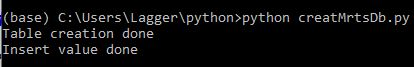


[Back to top](#Index)

## 3. Analysis and Visualization

MySQL Workbench and Python are two commonly used tools for querying and analyzing MySQL databases, but they offer different features that make them more suitable for certain use cases.

MySQL Workbench is a graphical user interface (GUI) for MySQL that allows users to work with databases using a visual interface rather than just writing code. An integrated query editor allows users to write and execute SQL queries on their dataset. This makes it easy to test these queries by ensuring that no other parameters can create an error.

However, it can be less efficient than writing queries in a programming language like Python because it requires more code to produce the same result. Python is a versatile programming language used for many tasks, including MySQL database queries. It offers great flexibility and power due to its wide range of libraries and tools. Using libraries like Pandas, users can modify the data, add calculations, and loop over data to perform advanced calculations. Python also offers the ability to perform more advanced analysis, such as graphing.

Ultimately, the choice between MySQL Workbench and Python will depend on the user's needs and preferences. MySQL Workbench is ideal for having an overview of the data and testing the query, while Python is more powerful and efficient for advanced analysis and task automation.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech


In order to verify that the data transfer has been carried out correctly the first test code opens the whole data table


USE mrts;  
Select *  
FROM data;

The query below displays the date in MM-YYYY format, the value and the Kind_of_Business

USE mrts;  
SELECT date_format(data.date, '%m-%Y') , data.Value, category.Kind_of_Business  
FROM data  
LEFT JOIN category   
ON data.IDcat  = category.ID ;

The query below displays the sum of the Value column when Kind_of_Business = 'New car dealers' for the year 1994

USE mrts;  
SELECT SUM(data.Value) as Total_Value  
FROM data  
LEFT JOIN category  
ON data.IDcat = category.ID  
WHERE category.Kind_of_Business = 'New car dealers'   
AND YEAR(data.date) = 1994;

This query below allows to check the sum realized by the previous query in the controledata table . It takes the annual value for a category

USE mrts;  
SELECT controledata.YerlyValue
FROM controledata
LEFT JOIN category ON controledata.IDcat = category.ID
WHERE category.Kind_of_Business = 'New car dealers'
AND YEAR like '%1994';

[Back to top](#Index)

### 3.2 Running Queries From Python

I used the query written above and added it to the pyton code. The script makes the sum per year for a category
in this case categorie 65 for the year 1992

In [20]:
import mysql.connector
import yaml 

# define the name of the new database
newDb = 'mrts'


with open('connection.yaml', 'r') as f:
    connection = yaml.safe_load(f)
    
    
# establish a connection to the MySQL database
cnx = mysql.connector.connect(**connection, database = newDb)   
cursor = cnx.cursor()


query = ("""
SELECT SUM(data.Value) as Total_Value
FROM data
LEFT JOIN category
ON data.IDcat = category.ID
WHERE category.ID = 65 AND YEAR(data.date) = 1992;')
""")
cursor.execute(query)


for row in cursor.fetchall():
    print(row)


# Close the cursor and connection to the database
cursor.close()
cnx.close()
print('done')



(Decimal('87260'),)
done


the file use the test this quvery is : pythonQuery.py  

below is the result 
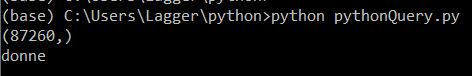

    

The script below allows to check if the import of the data has been done correctly by combining the query that sums by year and by category with the value present in the "controldata" table. The script goes through all the categories for each year, and any errors detected are displayed in the console.

Because there are only 5 totals that don't match, they have been checked manually and it is not an import error but a missing value in the dataset

the file use the test this quvery is : "mrtsTotalCheck.py"


In [21]:
import mysql.connector
import pandas as pd
import yaml 

# define the name of the new database
newDb = 'mrts'


with open('connection.yaml', 'r') as f:
    connection = yaml.safe_load(f)
    
    
# establish a connection to the MySQL database
cnx = mysql.connector.connect(**connection, database = newDb)    


# create a cursor object to execute SQL queries
cursor = cnx.cursor()

# define a function to perform data verification
def totalVerification(IDcat, Year):
    
    # select yearly values from the 'controledata' table
    query1 = f"""
    SELECT YerlyValue
    FROM controledata
    WHERE IDcat = {IDcat} AND Year LIKE '{Year}%';
    """
    cursor.execute(query1)
    result1 = cursor.fetchall()
    
    # select the sum of values from the 'data' table
    query2 = (f"""
    SELECT SUM(data.Value) as Total_Value
    FROM data
    WHERE IDcat = {IDcat}  AND date LIKE '{Year}%';
    """)
    cursor.execute(query2)
    result2 = cursor.fetchall()
    cnx.commit()

    
    # compare the two results and return an error if they don't match
    if result1[0][0] !=  result2[0][0]:
        controledataValue = result1[0][0]
        SumDataValue = result2[0][0]
        category = IDcat
        year = Year
        sumError = [(controledataValue),int(SumDataValue) ,category,year ]
        return sumError

# create lists of category IDs and years to iterate over
categorys = [*range(1, 64, 1)]
Years = [*range(1992, 2021, 1)]

# iterate over each combination of category and year
for category in categorys:
    for Year in Years:
        # call the 'totalVerification' function and print any errors that are returned
        wrongRow = totalVerification(category, Year)
        if wrongRow != None:
            print(wrongRow)
            

# Close the cursor and connection to the database
cursor.close()
cnx.close()

[None, 36290, 17, 2020]
[None, 2969, 18, 2017]
[None, 17532, 19, 2020]
[None, 3849, 36, 2020]
[None, 4042, 62, 2018]


[Back to top](#Index)

### 3.3 Explore Trends

An economic trend refers to a pattern of behavior observed over a period of time for a specific economic indicator, such as consumer spending. It is considered an important measure for forecasting quantities because it can help identify seasonal , current and future trends in the market

For example, if the economic trend indicates a decline in consumer spending, businesses can prepare themselves by reducing production, adjusting prices, or investing in alternative marketing strategies. Similarly, if the economic trend suggests a rise in employment rates, policymakers can anticipate an increase in tax revenues and adjust government spending accordingly.

Economic trends are important measures for predicting quantities such as spending patterns, as they provide valuable insights into the economic health of a country, and are an essential tool for making informed business and policy decisions.


#### 3.3.1 Retail and food services sales

Looking at the graph below, it is clearly visible that the "Retail and food services sales" category has been on a long-term upward trend since the beginning of available data in 1992. However, there was a decline in sales during the 2008 recession. On the monthly values graph , there is a lot of noise, which indicates a large variation over the year. Therefore, it is easier to see the trend on the yearly graph.

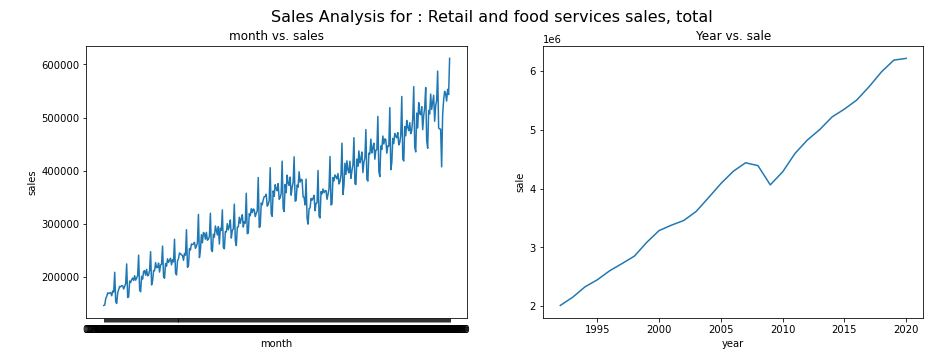

In order to observe seasonal trends, I have overlaid  each year on the same graph using the code of "Selva Prabhakaran" available on the site machinelearningplus.com.

On this graph, we can see variations in trends throughout the year. The peak of consumption is at the end of the year, which can easily be explained by christmas and new years celebration. Other peaks are observed in March, May and August, and troughs in February, April and September. To understand the origin of these monthly variations, a more in-depth study would be necessary.
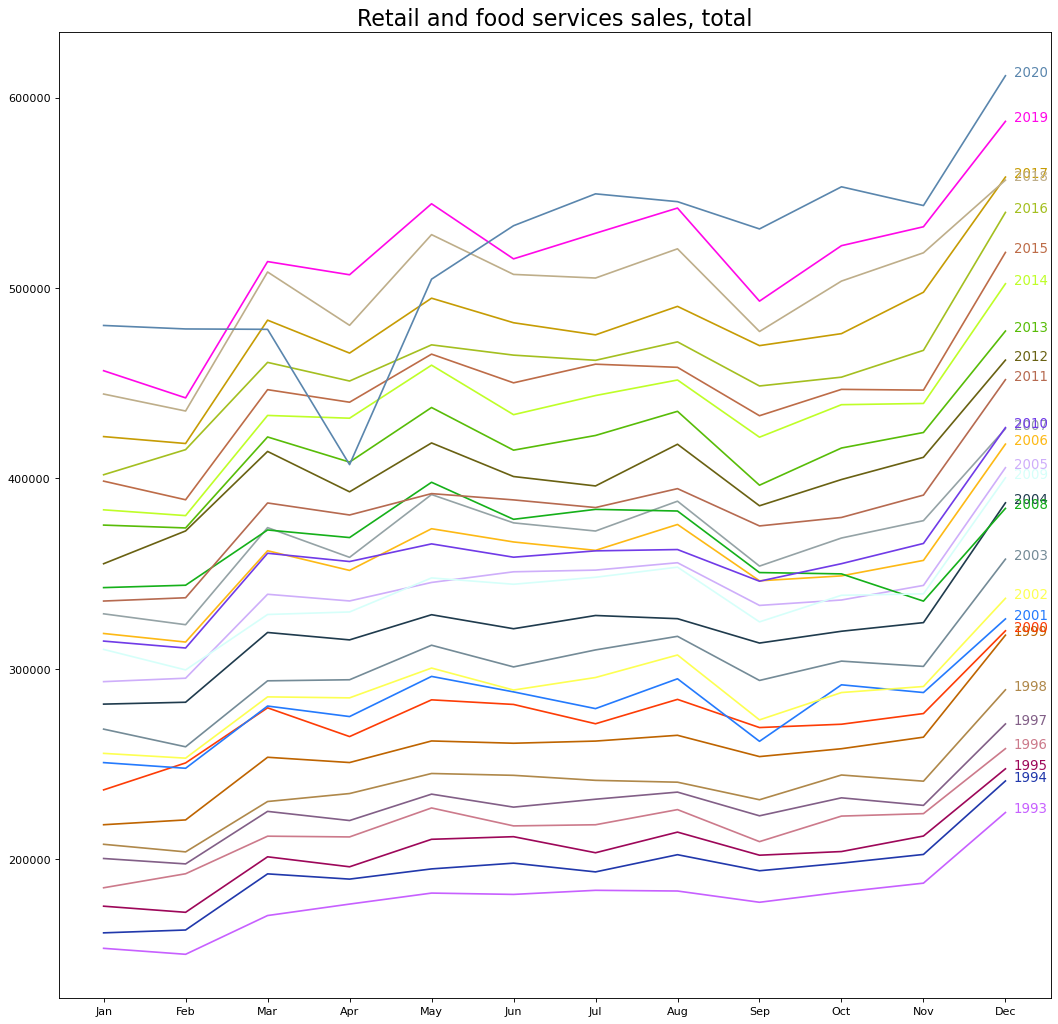

the file use the see this plots : "retail_and_food_services_sales.py"

To make these graphs, two SQL queries were used.

The first query returns two columns. The first column uses the date_format function to convert the dates of the data table to the mm-YYYY format. The second column consists of the values corresponding to a "Kind_of_Business" type. A join has been made to be able to search directly by "Kind_of_Business", because these data are in another table named category. This query provides the sales values for each month in the format required for the first chart.

**Here is the first query:**

SELECT date_format(data.date, '%m-%Y') as month, data.Value  
FROM data  
LEFT JOIN category  
ON data.IDcat = category.ID  
WHERE category.Kind_of_Business = '{Kind_of_Business}';

The second query performs the same operation as the first, but adds the category values by year. This query provides the total sales values for each year in the format required for the second graph.

**Here is the second query**

SELECT YEAR(data.date) as Year, SUM(data.Value) as Total_Value  
FROM data  
LEFT JOIN category  
ON data.IDcat = category.ID  
WHERE category.Kind_of_Business = '{Kind_of_Business}'  
GROUP BY YEAR(data.date);

It would also be possible to realize just the first query and then use the function df.groupby  to have the same reslut as the second query

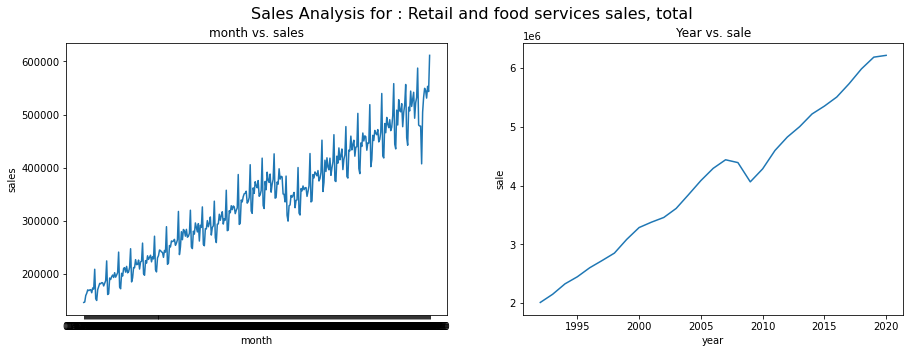

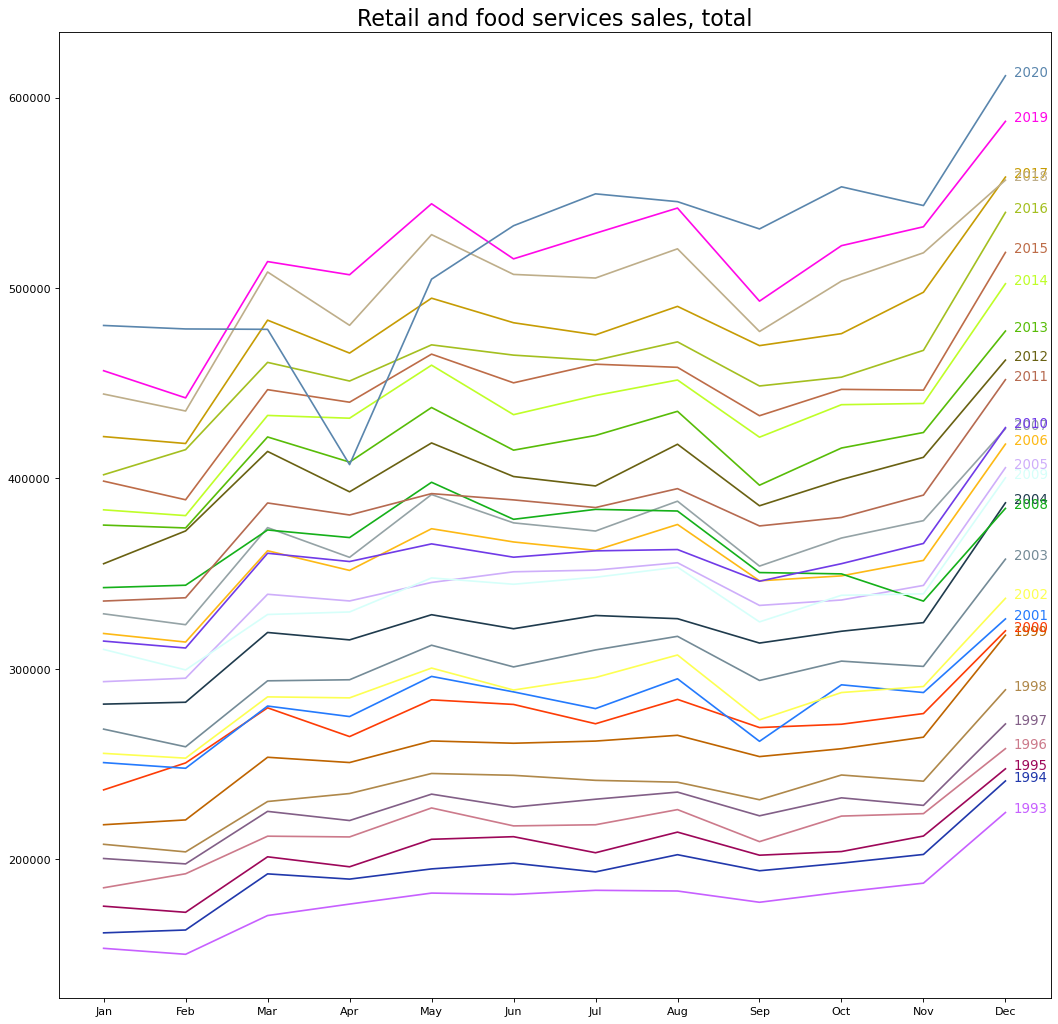

In [22]:
import pandas as pd
import yaml 
import matplotlib.pyplot as plt
import mysql.connector
import numpy as np
import matplotlib as mpl

# define the name of the new database
newDb = 'mrts'


# define category to import
Kind_of_Business = 'Retail and food services sales, total'


with open('connection.yaml', 'r') as f:
    connection = yaml.safe_load(f)
    
    
# establish a connection to the MySQL database
cnx = mysql.connector.connect(**connection, database = newDb)    

# create a cursor object to execute SQL queries
cursor = cnx.cursor()


query = (f"""
SELECT date_format(data.date, '%m-%Y') as month, data.Value   
FROM data
LEFT JOIN category 
ON data.IDcat = category.ID 
WHERE category.Kind_of_Business = '{Kind_of_Business}';
""")
         
cursor.execute(query)


month = []
sales = []

         
         
         
for row in cursor.fetchall():
    month.append(row[0])
    sales.append(row[1])
    


query2 = (f"""
SELECT YEAR(data.date) as Year, SUM(data.Value) as Total_Value 
FROM data
LEFT JOIN category
ON data.IDcat = category.ID
WHERE category.Kind_of_Business = '{Kind_of_Business}'
GROUP BY YEAR(data.date);
""")

cursor.execute(query2)

# Close the cursor and connection to the database

Year = []
Ysales = []     
         
         
for row in cursor.fetchall():
    Year.append(row[0])
    Ysales.append(row[1])

cursor.close()
cnx.close()


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Add a general title to the figure
fig.suptitle(f'Sales Analysis for : {Kind_of_Business}', fontsize=16)

# Plot each numeric column against the SalePrice column

axs[0].plot(month, sales)
axs[0].set_xlabel('month')
axs[0].set_ylabel('sales')
axs[0].set_title('month vs. sales')

axs[1].plot(Year, Ysales)
axs[1].set_xlabel('year')
axs[1].set_ylabel('sale')
axs[1].set_title('Year vs. sale')
plt.show()


# Convert the 'month' list to datetime format
month = pd.to_datetime(month, format='%m-%Y')

# Create the DataFrame with the 'date' column as index
df = pd.DataFrame({'sales': sales}, index=month, columns=['sales'])
# Prepare data

#############################################
# the code below was copied and adapted from
# Selva Prabhakaran (February 13, 2019). Seasonal Plot of a Time Series. machinelearningplus.com https://www.machinelearningplus.com/time-series/time-series-analysis-python/


# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,16), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'sales', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'sales'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration

plt.title(f'{Kind_of_Business}', fontsize=20)
plt.show()

##############################################################

#### 3.3. 2 bookstores, sporting goods stores, and hobbies, toys, and games stores

By examining the graphs below, we can compare sales for the following categories:bookstores, sporting goods stores, and hobbies, toys, and games stores.

The "Sales monthly value" graph shows that there is a lot of noise in all three categories, which indicates a strong seasonality. We can observe that the category "Sporting Goods Stores" is in an upward trend since the beginning of the available data.

The "Sales yearly value" graph gives us a better idea of the long-term trends. In general, all three categories show almost no change in sales during recession years, such as 2000 and 2008. We see that in 1992 the gap between the 3 categories was minimal but that over the years the gap has widened considerably and that "sporting goods stores" is the category that has undergone the greatest growth while bookstores have experienced the greatest decline in sales.

- Sales of "sporting goods stores" are up almost constantly, with a slowdown around 2017, followed by a sharp increase following the COVID crisis.
- Sales of "hobby, toy and game stores" are flat over the long term, although the category was up slightly between 1992 and 2000.
- Sales of "bookstores" were on an upward trend until 2004, then sales stabilized for a few years before beginning a downward trend since 2008. This is probably due to the use of new types of media for reading.

The graph showing sales between 2010 and 2021 shows the consumption seasons very clearly. It is interesting to note that "Hobby, toy and game stores" have only one consumption peak at the end of the year, while the other two categories have two consumption peaks respectively.

We can also see that bookstore sales reached a record high during 2020.


the file use the see this plots : "bookstores_sporting_toys_games.py"

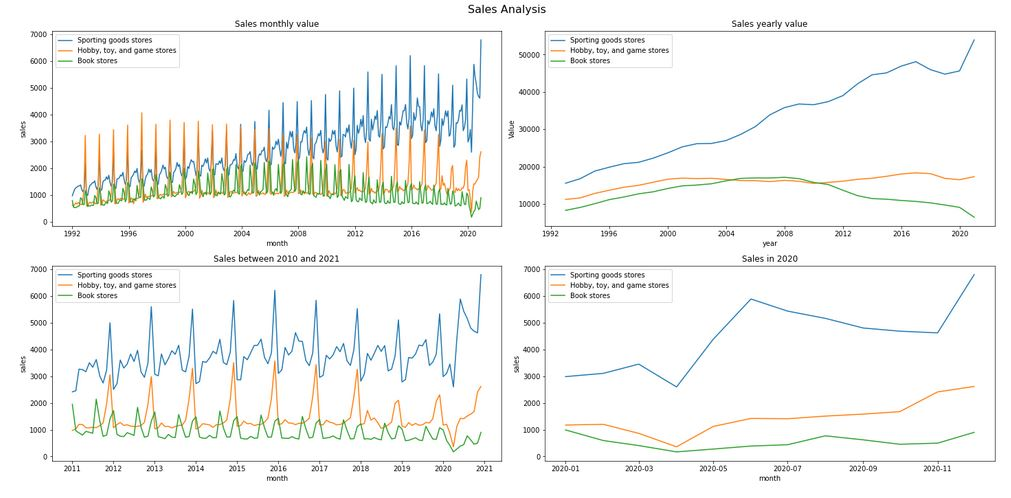

To make these graphs, one SQL queries were used.

It is the same as in the previous chapter 
**Here is query:**

SELECT date_format(data.date, '%m-%Y') as month, data.Value  
FROM data  
LEFT JOIN category  
ON data.IDcat = category.ID  
WHERE category.Kind_of_Business = '{Kind_of_Business}';

I then used functions of the Pandas library to group the categories by year and also to display only a part of the values 

348


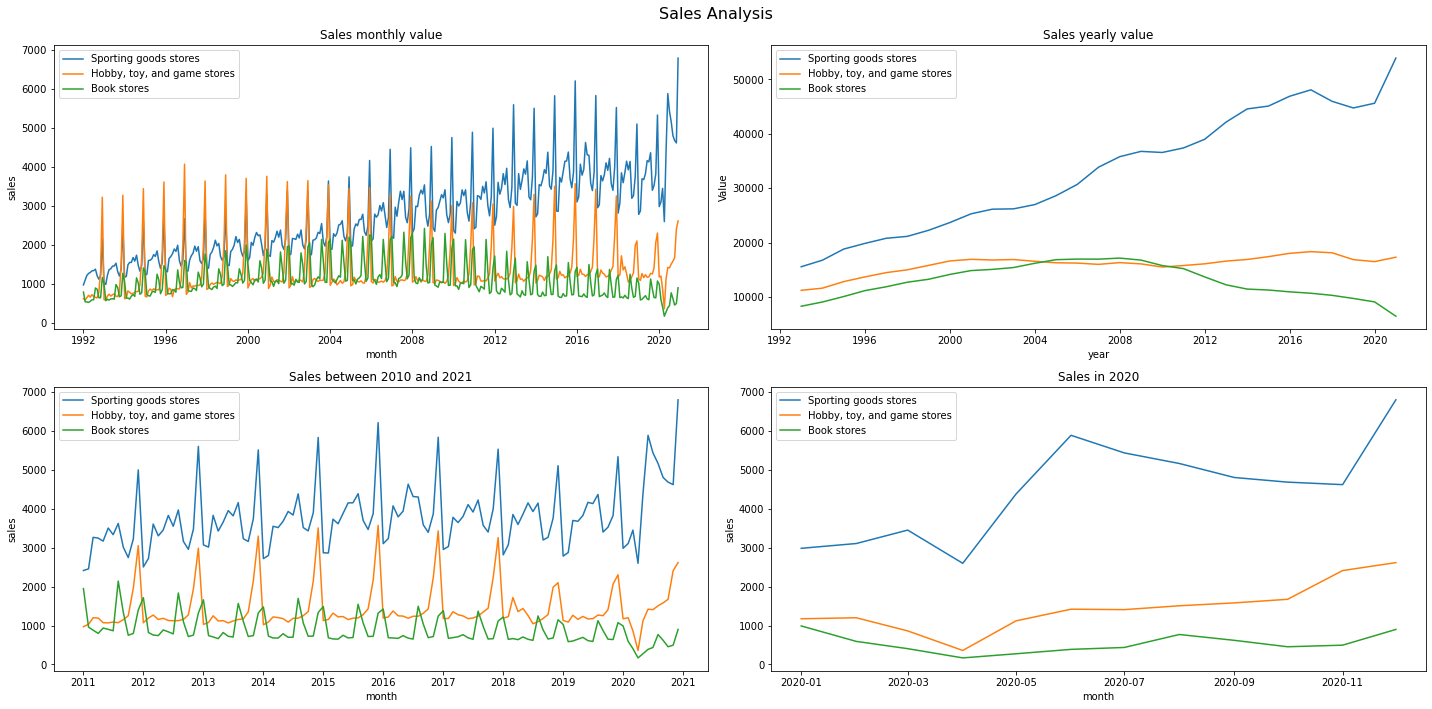

In [23]:
import pandas as pd
import mysql.connector
import yaml 
import matplotlib.pyplot as plt



cat1 = 'Sporting goods stores'
cat2 = 'Hobby, toy, and game stores'
cat3 = 'Book stores'

# define the name of the new database
newDb = 'mrts'

def valueKind_of_Business_by_year(Kind_of_Business):
    with open('connection.yaml', 'r') as f:
        connection = yaml.safe_load(f)


    # establish a connection to the MySQL database
    cnx = mysql.connector.connect(**connection, database = newDb)    

    # create a cursor object to execute SQL queries
    cursor = cnx.cursor()


    query = (f"""
    SELECT date_format(data.date, '%m-%Y') as month, data.Value   
    FROM data
    LEFT JOIN category 
    ON data.IDcat = category.ID 
    WHERE category.Kind_of_Business = '{Kind_of_Business}';
    """)
    cursor.execute(query)
    


    month = []
    sales = []




    for row in cursor.fetchall():
        month.append(row[0])
        sales.append(row[1])
    # Close the cursor and connection to the database
    cursor.close()
    cnx.close()
    return month, sales
    
month1,sales1 = valueKind_of_Business_by_year(cat1)
month2,sales2 = valueKind_of_Business_by_year(cat2)
month3,sales3 = valueKind_of_Business_by_year(cat3)



print(len(month3))


# Convert the 'month' list to datetime format
month1 = pd.to_datetime(month1, format='%m-%Y')

#creat the datafram
df = pd.DataFrame(list(zip(sales1, sales2, sales3)),columns =['sales cat1', 'sales cat2', 'sales cat3'], index=month1)
df.index.name='date'

# Prepare data

#creat the datafram grouped by year
dfYear = df.groupby(pd.Grouper(freq='1Y')).agg({'sales cat1':'sum',
                                              'sales cat2':'sum',
                                              'sales cat3':'sum'})

# creat df with data between 2010 and 2021

df_filtered = df[ (df.index.year > 2010) & (df.index.year <= 2021)]

# creat df with data for 2020
df_filtered2 = df[ (df.index.year > 2019) & (df.index.year <= 2021)]


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Add a general title to the figure
fig.suptitle(f'Sales Analysis', fontsize=16)

# Plot each numeric column against the SalePrice column
axs[0,0].plot(month1,df['sales cat1'],label=cat1)
axs[0,0].plot(month1,df['sales cat2'],label=cat2)
axs[0,0].plot(month1,df['sales cat3'],label=cat3)
axs[0,0].set_xlabel('month')
axs[0,0].set_ylabel('sales')
axs[0,0].set_title('Sales monthly value')
axs[0,0].legend()

axs[0,1].plot(dfYear.index,dfYear['sales cat1'], label=cat1)
axs[0,1].plot(dfYear.index,dfYear['sales cat2'], label=cat2)
axs[0,1].plot(dfYear.index,dfYear['sales cat3'], label=cat3)

axs[0,1].set_xlabel('year')
axs[0,1].set_ylabel('Value')
axs[0,1].set_title('Sales yearly value')
axs[0,1].legend()


# Plot each numeric column against the SalePrice column
axs[1,0].plot(df_filtered.index,df_filtered['sales cat1'],label=cat1)
axs[1,0].plot(df_filtered.index,df_filtered['sales cat2'],label=cat2)
axs[1,0].plot(df_filtered.index,df_filtered['sales cat3'],label=cat3)
axs[1,0].set_xlabel('month')
axs[1,0].set_ylabel('sales')
axs[1,0].set_title('Sales between 2010 and 2021')
axs[1,0].legend()

# Plot each numeric column against the SalePrice column
axs[1,1].plot(df_filtered2.index,df_filtered2['sales cat1'],label=cat1)
axs[1,1].plot(df_filtered2.index,df_filtered2['sales cat2'],label=cat2)
axs[1,1].plot(df_filtered2.index,df_filtered2['sales cat3'],label=cat3)
axs[1,1].set_xlabel('month')
axs[1,1].set_ylabel('sales')
axs[1,1].set_title('Sales in 2020')
axs[1,1].legend()

fig.tight_layout()

plt.show()


[Back to top](#Index)

### 3.4 Explore Percentage Change

The percentage change is an important measure in economics because it allows us to quantify the evolution of a variable over a given period. This measure makes it easy to compare two values at different times by taking into account the relative difference between the two values. For example, the percentage change in spending patterns can be calculated to measure the growth or decline in household spending over a given period.

Percentage change is also useful for evaluating the performance of a business by comparing revenues or profits over several periods. It is also used to predict future trends, as it can determine whether a variable is growing or declining, and how fast. Economists can use this measure to predict future economic developments, particularly in the area of consumption, where spending patterns can have a significant impact on economic growth.

The graphs below show a comparison of clothing sales between men and women. The first graph shows that women generally buy significantly more clothing than men, by a factor of about 3x. The second graph shows the percentages of change and indicates that clothing sales between men and women are highly correlated. The third graph confirms this correlation by showing that the difference between sales changes is limited, ranging from 0.05 to -0.1 over the entire period.

The fourth graph displays the share of the apparel market represented by women's apparel purchases. It can be seen that women largely dominate this sector and that their market share is steadily increasing. In 2000, women's clothing purchases accounted for 75% of the market, while today they account for 84%.

These results highlight the importance of the women's clothing market, which is constantly growing. cloth companies can use this information to better target their audience and tailor their offerings to market trends, knowing that women represent the majority of apparel buyers and their market share continues to grow.

the file use the see this plots : "clothing_stores.py"

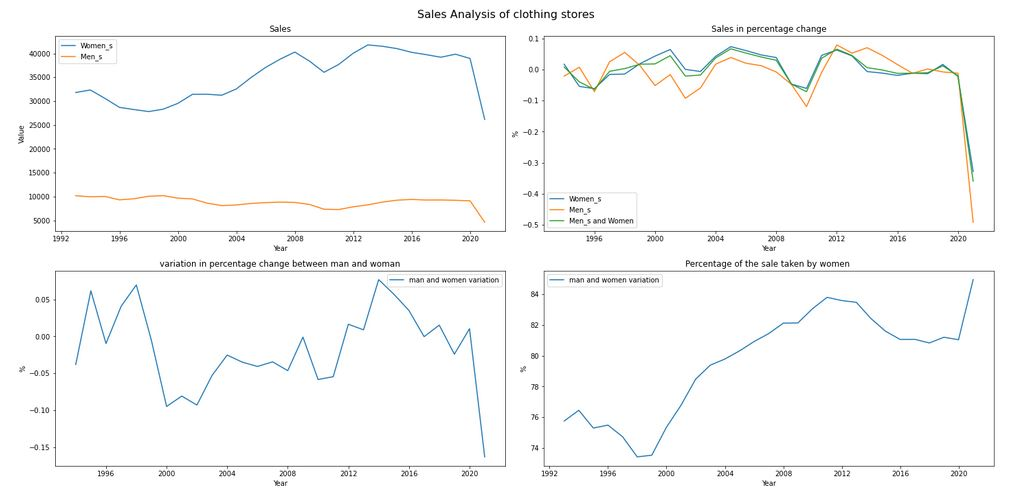

To make these graphs, one SQL queries were used.

The following SQL query is almost identical to the one in the previous section. However, it has been modified slightly because the apostrophe " ' " in the category name was causing a problem when importing into the Python script while it was working in mysql workbench. To work around this problem, the apostrophe was replaced with an underscore "_" and the WHERE condition was changed from "=" to "LIKE".

**Here is query:**
SELECT date_format(data.date, '%m-%Y') as month, data.Value  
FROM data  
LEFT JOIN category  
ON data.IDcat = category.ID  
WHERE category.Kind_of_Business LIKE '{Kind_of_Business}';


I then used functions of the Pandas library to group the categories by year and also to display only a part of the values 

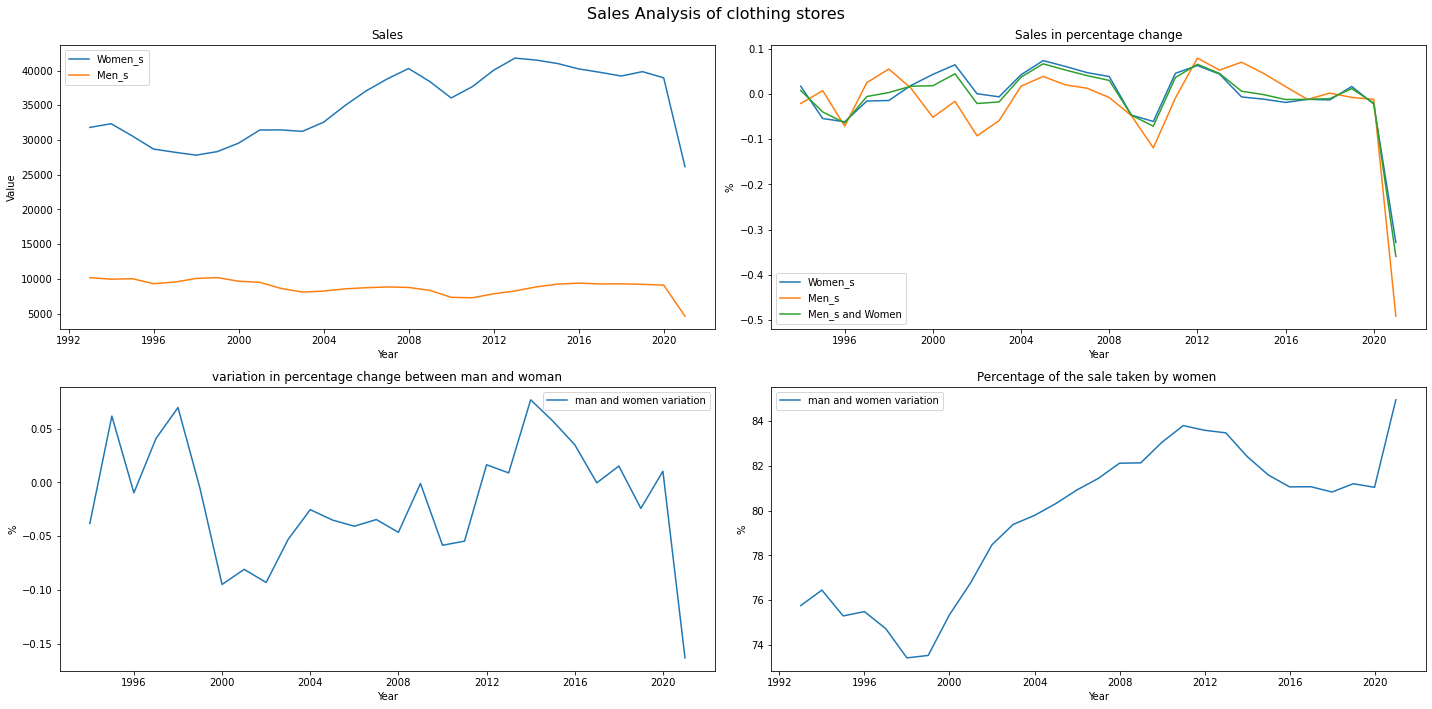

In [24]:
cat1 = 'Men_s clothing stores'
cat2 = 'Women_s clothing stores'


import pandas as pd
import mysql.connector
import yaml 
import matplotlib.pyplot as plt

# define the name of the new database
newDb = 'mrts'

def valueKind_of_Business_DF(Kind_of_Business):
    with open('connection.yaml', 'r') as f:
        connection = yaml.safe_load(f)


    # establish a connection to the MySQL database
    cnx = mysql.connector.connect(**connection, database = newDb)    

    # create a cursor object to execute SQL queries
    cursor = cnx.cursor()
   
    query = (f"""
    SELECT date_format(data.date, '%m-%Y') as month, data.Value   
    FROM data
    LEFT JOIN category 
    ON data.IDcat = category.ID 
    WHERE category.Kind_of_Business LIKE '{Kind_of_Business}';
    """)
    cursor.execute(query)
    
    #creat the datafram with the result from the query
    df = pd.DataFrame(data=cursor.fetchall(), index=None)
    df.columns = ['date', 'sales']
    df['date'] = pd.to_datetime(df['date'], format='%m-%Y')
    df.set_index('date', inplace = True)
    
    # Close the cursor and connection to the database
    cursor.close()
    cnx.close()
    return df
    
df1 = valueKind_of_Business_DF(cat1)
df2 = valueKind_of_Business_DF(cat2)


df_combined = df1.join(df2, lsuffix=' Men_s', rsuffix=' Women_s')


# Replace missing values with the one-year moving average
rolling_mean  = df_combined.rolling(window=4, min_periods=1).mean()  # calulat the mean
df_combined.fillna(rolling_mean, inplace=True)  # Replace missing values with the moving average


#creat a new column with man an women's sale
df_combined['sales Men_s and Women'] = df_combined['sales Men_s'] + df_combined['sales Women_s']




#creat the datafram grouped by year
df_combined_Year = df_combined.groupby(pd.Grouper(freq='1Y')).agg({'sales Men_s and Women':'sum',
                                                                    'sales Men_s':'sum',
                                                                    'sales Women_s':'sum'})

#percentage of the market taken by women 
df_combined_Year['Women_p'] = (df_combined_Year['sales Women_s'] / df_combined_Year['sales Men_s and Women']) * 100


#calcul the percentage change
dfpercent  = df_combined_Year.pct_change()




#calcul the difference between men % and Women %
dfpercent['diff'] = dfpercent['sales Men_s'] - dfpercent['sales Women_s']


# Create a subplot with 2 row and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(20, 10))


# Add a general title to the figure
fig.suptitle(f'Sales Analysis of clothing stores', fontsize=16)

# Plot each numeric column against the SalePrice column
axs[0,0].plot(df_combined_Year.index,df_combined_Year['sales Women_s'], label='Women_s')
axs[0,0].plot(df_combined_Year.index,df_combined_Year['sales Men_s'], label='Men_s')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Value')
axs[0,0].set_title('Sales')
axs[0,0].legend()


axs[0,1].plot(dfpercent.index,dfpercent['sales Women_s'], label='Women_s')
axs[0,1].plot(dfpercent.index,dfpercent['sales Men_s'], label='Men_s')
axs[0,1].plot(dfpercent.index,dfpercent['sales Men_s and Women'], label='Men_s and Women')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('%')
axs[0,1].set_title('Sales in percentage change')
axs[0,1].legend()




axs[1,0].plot(dfpercent.index,dfpercent['diff'], label='man and women variation')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('%')
axs[1,0].set_title('variation in percentage change between man and woman')
axs[1,0].legend()

axs[1,1].plot(df_combined_Year.index,df_combined_Year['Women_p'], label='man and women variation')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('%')
axs[1,1].set_title('Percentage of the sale taken by women ')
axs[1,1].legend()


fig.tight_layout()

plt.show()


[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

A rolling time window is a method for measuring changes in an economic variable using a moving time window. For example, using a 12-month window to measure consumption patterns, the window is moved forward 1 month each month to include data from the last 12 months. This method minimizes short-term effects on the data and provides a more accurate view of economic trends. The resulting information can be used to make more reliable forecasts of future economic activity and to make more informed policy decisions.

By using rolling time windows, one short and one long, economists can get a view of both short and long term trends in economic data. The short window provides a detailed view of recent fluctuations, while the long window provides an overall view of trends over a longer period. By comparing the two, economists can better understand the influence of short-term trends on long-term trends. This method provides a more complete understanding of the economic data to make more informed forecasts and decisions.

The graphs below represent sales in the 'Furniture, home furnishings, electronics, and appliance stores' category. As seen on other charts, we can observe a strong seasonality in this category.

However, by using Rolling Time Windows, we can smooth the curve and easily see the trend. By using two moving averages of different lengths, one can notice the trend changes. When the short average is clearly above the long average, we can say that we are in an uptrend, and vice versa.

We can see that the uptrend stopped around 2008, when the 24 month moving average rose above the 12 month moving average. This shows that the new trend is downward until 2011, when the averages reversed again, showing the resumption of a slightly upward trend.

It should be noted that this product category is particularly sensitive to economic fluctuations. Sales declines can be linked to economic recessions, supply chain disruptions, or changes in consumer product preferences. Therefore, trend analysis is important for companies in this category to understand the underlying factors affecting sales and adjust their strategy accordingly.



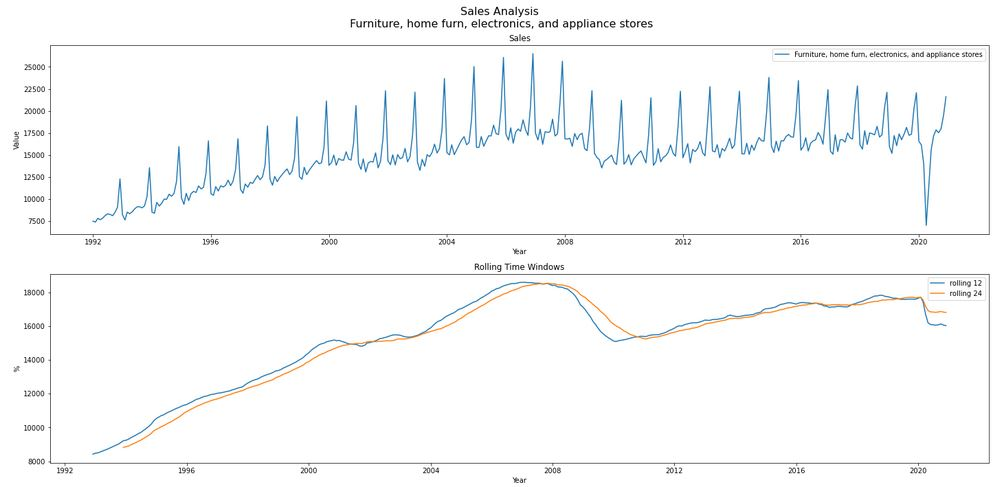


To make these graphs, one SQL queries were used.

It is the same as in the previous chapter 
**Here is query:**

SELECT date_format(data.date, '%m-%Y') as month, data.Value  
FROM data  
LEFT JOIN category  
ON data.IDcat = category.ID  
WHERE category.Kind_of_Business = '{Kind_of_Business}';

I then used functions of the Pandas library to group the categories by year and also to display only a part of the values 

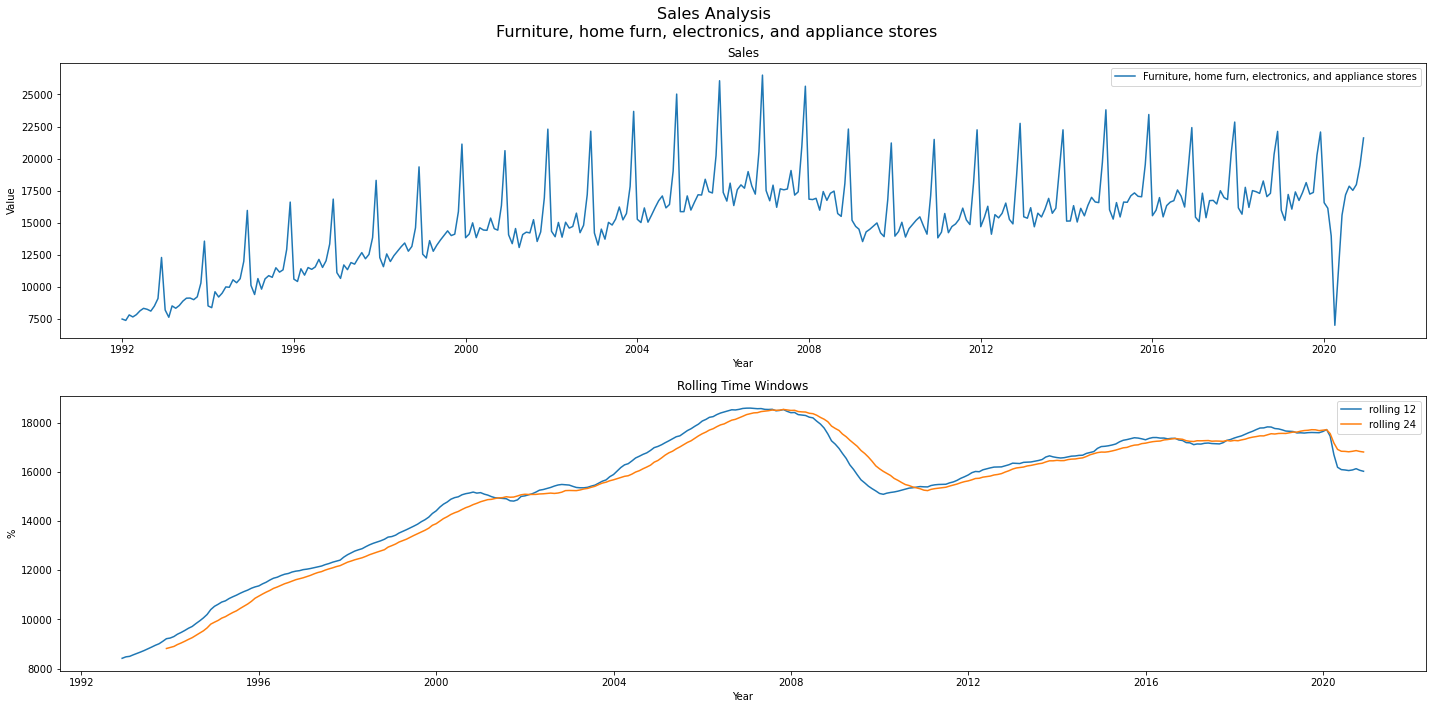

caca


In [25]:
import pandas as pd
import mysql.connector
import yaml 
import matplotlib.pyplot as plt



Kind_of_Business = 'Furniture, home furn, electronics, and appliance stores'

# define the name of the new database
newDb = 'mrts'

def valueKind_of_Business_by_year(Kind_of_Business):
    with open('connection.yaml', 'r') as f:
        connection = yaml.safe_load(f)


    # establish a connection to the MySQL database
    cnx = mysql.connector.connect(**connection, database = newDb)    

    # create a cursor object to execute SQL queries
    cursor = cnx.cursor()

    query = (f"""
                SELECT DATE_FORMAT(data.date, '%m-%Y') AS month_year , data.Value
                FROM data
                LEFT JOIN category
                ON data.IDcat = category.ID
                WHERE category.Kind_of_Business LIKE '%{Kind_of_Business}';
    """)
    cursor.execute(query)
    


    month = []
    sales = []




    for row in cursor.fetchall():
        month.append(row[0])
        sales.append(row[1])
    # Close the cursor and connection to the database
    cursor.close()
    cnx.close()
    return month, sales
    
month1,sales1 = valueKind_of_Business_by_year(Kind_of_Business)

# Convert the 'month' list to datetime format
month1 = pd.to_datetime(month1, format='%m-%Y')


#creat the datafram
df = pd.DataFrame((sales1),columns =['sales cat1'], index=month1)
df.index.name='date'

#preper the data
dfRolling1 = df.rolling(12).mean()
dfRolling2 = df.rolling(24).mean()




# Create a subplot with 2 row and 2 columns
fig, axs = plt.subplots(2, 1, figsize=(20, 10))


# Add a general title to the figure
fig.suptitle(f'Sales Analysis \n{Kind_of_Business}', fontsize=16)

# Plot each numeric column against the SalePrice column
axs[0].plot(month1,sales1, label=Kind_of_Business)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Value')
axs[0].set_title('Sales')
axs[0].legend()


axs[1].plot(month1,dfRolling1['sales cat1'],label='rolling 12')
axs[1].plot(month1,dfRolling2['sales cat1'],label='rolling 24')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('%')
axs[1].set_title('Rolling Time Windows')
axs[1].legend()


fig.tight_layout()

plt.show()


[Back to top](#Index)

## Conclusion

In conclusion, the ETL process plays a vital role in improving data management, decision-making processes, and collaboration between departments in businesses. By centralizing data and cleaning it up, the ETL process enables companies to track trends and patterns in their data, making it easier to identify areas for improvement. The Monthly Retail Trade Survey dataset used in this report highlights the importance of data exploration and preparation steps in ensuring data quality and reliability. Finally, the installation script simplifies the process of setting up the required environment for the dataset, making it more accessible to businesses that want to explore and analyze the data.



[Back to top](#Index)
## References


book:
Guillaume Broc and Benjamin Caumei,  Analyse de données , Editor: DE BOECK SUP , 29.04.2018

code:
Selva Prabhakaran (February 13, 2019). Seasonal Plot of a Time Series. machinelearningplus.com https://www.machinelearningplus.com/time-series/time-series-analysis-python/

unknown author, unknown date ,How to Export Multiple Excel sheets to CSV or Text Files Using Visual Basic
https://store.chipkin.com/articles/how-to-export-multiple-excel-sheets-to-csv-or-text-files-using-visual-basic

unknown author, unknown date ,How to run the same macro on multiple worksheets at same time in Excel?
https://www.extendoffice.com/documents/excel/5333-excel-run-macro-multiple-sheets.html

websites
Adam Hayes. Understanding Trend Analysis and Trend Trading Strategies, https://www.investopedia.com/terms/t/trendanalysis.asp
   




